# Unit 2: Things to Consider when Choosing the 'Right' Clustering Algorithm
Case Study</u>: How do we go about choosing the ‘right’ clustering algorithm? We’ll look at several 2-d artificial datasets to showcase the various goals for using and choosing a clustering algorithm.

<hr>

## Purpose of this Lecture:
* Provide a **road-map** for the different clustering algorithms we will learn in this class.
* In this lecture we will introduce and **categorize different types of clustering algorithms**. 
* Specifically we will introduce the different types of questions to consider when **choosing the 'right' clustering algorithm** for a given dataset, research question, or research goal. 
* Using **2-d datasets**, we will develop an **intuition** for:
  * why the **k-means** clustering algorithm performs effectively for certain types of datasets, 
  * why the k-means clustering algorithm does not perform well for other types of datasets,
  * **what other types of algorithms will work well** for these types of datasets.

* Become more acclimated with using Python.

<hr>


## Summary of Concepts
* ### Nature of The Data:
  * What **type of attributes** is this clustering algorithm designed for (ie. numerical attributes? categorical attributes? a mixture of both?)
* ### "Unclean" Data Considerations:
  * Will the algorithm **perfom effectively** when the data has **noise** and/or **outliers**?
  * What will the algorithm **do with a noisy object**?
    * Identify it as noise?
    * Put it in a cluster with other elements?
    * Make it it's own cluster?
  * What will the algorithm **do with an outlier**?
    * Identify it as an outlier?
    * Put it in a cluster with other elements?
    * Make it it's own cluster?
  *  *How do we know if a dataset with 4 or more attributes has noise or outliers?*
* ### Definition of a "Cluster"
  * If there is some "clustering" structure in the dataset, what is the best way to **define the nature of a given "cluster"**?
    * Well-Separated cluster
    * Prototype-based cluster
    * Graph-based cluster
    * Density-based cluster
    * Shared-property (conceptual) cluster
  * *How do we know what the clusters look like (ie. what they should be defined by) in a dataset with 4 or more attributes*?
* ### Types of Clustering Results
  * What would we like our clustering result to tell us about the "grouping" nature of the data?
    * **Partition Results vs. Hierarchical Results**
      * <u>Partition Results</u>: Do we want just one grouping?
      * <u>Hierarchical Results</u>: Are our clusters "nested"? Are some clusters closer to other clusters? Do we want to see this "nested" cluster nature in our results?
      * **Exclusive vs. Overlapping vs. Fuzzy**
        * <u>Exclusive Clustering Result</u>: Do we want our objects to belong to just one cluster?
        * <u>Overlapping Clustering Result</u>: Can objects in our clustering belong to more than one cluster
        * <u>Fuzzy Clustering Result</u>: Instead of assigning an object to a cluster(s), what if wanted to attain a cluster membership score for each object i and each cluster j (ie. $score(x_{ij})\in [0,1]$, represents the "percent" to which object i belongs to cluster j).

* ### Types of Algorithm Performance Measures to Consider
  * (Will discuss in future lecture)


<hr>

In [ ]:
#Basic Packages Most Python Data Analysis will Require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#This allows us for our matplotlib plots to show up as cell output.
#(without this the plots we make may show up as windows that popout)
%matplotlib inline
print("Inline Functionality Set")
print('Basic Packages Loaded')

Inline Functionality Set
Basic Packages Loaded


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Common Descriptive Analytics Algorithms we will demonstrate in this class
from sklearn.cluster import KMeans
'Descriptive Analytics Algorithms Loaded'

'Descriptive Analytics Algorithms Loaded'

* ### Nature of The Data:
  * What **type of attributes** is this clustering algorithm designed for (ie. numerical attributes? categorical attributes? a mixture of both?)




>> k-means algorithm is designed to run only for _ _ _ _FILL IN BLANK _ _ _ _ _

>> We can use **k-modes** algorithm for _ _ _ _FILL IN BLANK _ _ _ _ _.

<hr>









### "Unclean" Data Considerations:
  * Will the algorithm **perfom effectively** when the data has **noise** and/or **outliers**?
  * What will the algorithm **do with a noisy object**?
    * Identify it as noise?
    * Put it in a cluster with other elements?
    * Make it it's own cluster?
  * What will the algorithm **do with an outlier**?
    * Identify it as an outlier?
    * Put it in a cluster with other elements?
    * Make it it's own cluster?
  *  *How do we know if a dataset with 4 or more attributes has noise or outliers?*

<hr>

### <u>Example 1</u>: Let's take a look at what k-means algorithm will do in the presence of **noise**.

#### First let's load and inspect the data (because it is 2-d).



In [ ]:
#Let's read a csv into a dataframe from this url below
df=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/zelnik4.csv')
df.head()

,x,y,actual_cluster
0,0.268201,0.156184,3
1,0.246988,0.235360,3
2,0.288534,0.164136,3
3,0.245849,0.160949,3
4,0.225325,0.230486,3


In [ ]:
#How many 'actual' clusters are there?
df['actual_cluster'].drop_duplicates()

0      3
109    2
137    1
252    0
484    4
Name: actual_cluster, dtype: int64

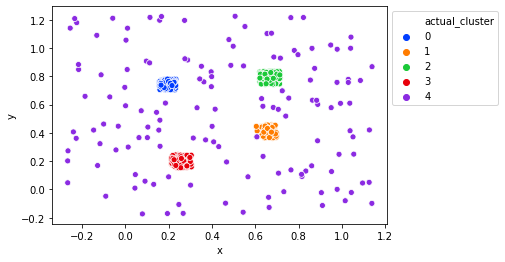

In [ ]:
#Let's set the color palette to the "bright" variety with 5 available colors (to match the number of clusters)
palette = sns.color_palette("bright", 5)

sns.scatterplot(x="x", y="y", hue='actual_cluster', data=df, legend='full', palette=palette)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### While the dataset clearly, shows 4 densely compact clusters, they are surrounded by a cloud of noise.
a. First let's see what k-means algorithm will do when we ask for the "right amount of clusters."

In [ ]:
X=df[['x','y']]
kmeans=KMeans(n_clusters=4).fit(X)
df['predicted_cluster']=kmeans.labels_

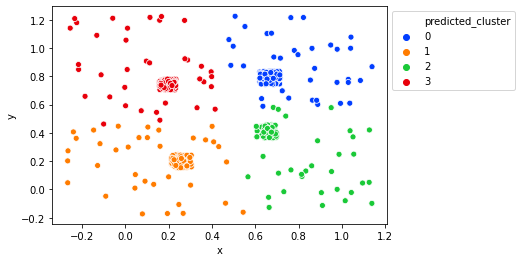

In [ ]:
palette = sns.color_palette("bright", 4)

sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df, legend='full', palette=palette)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

> **A prototype-based definition of a cluster**: defines a cluster as a set of objects in which each object is closer (or more similar) to the prototype that defines the cluster than to the prototype of any other cluster.

>> **k-means** algorithm uses a proto-type based definition of a cluster where the  _ _ _ _FILL IN BLANK _ _ _ _ _  can be thought of as the prototype.

b. Given the densely compact clusters in the data above:
  * Where would we WANT the prototype (ie. centroid) to be?
  * Where do you think the prototypes (ie. centroids) WILL be?

In [ ]:
#First, let's find the centroids
df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['x','y'])
df_centroids

,x,y
0,0.694665,0.808993
1,0.221579,0.193478
2,0.702193,0.362032
3,0.169034,0.773031


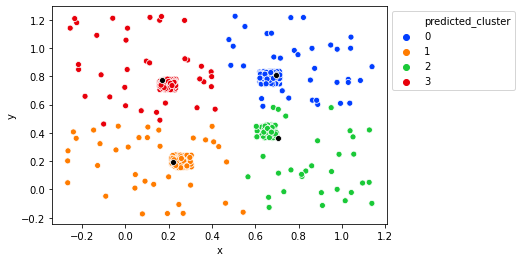

In [ ]:
palette = sns.color_palette("bright", 4)

sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df, legend='full', palette=palette)
sns.scatterplot(x="x", y="y",color='black', data=df_centroids)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#What happens if we run it multiple times (asking for different cluster numbers?
cluster_num_list=range(1,8)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    for i in range(0,3):
        sub_inertia_list=[]
        kmeans=KMeans(n_clusters=k).fit(df[df.columns[1:len(df.columns)]])
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


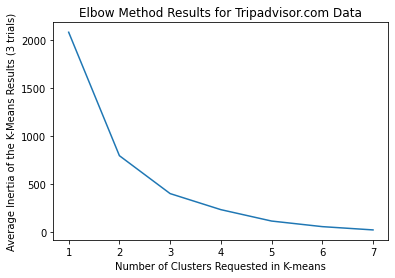

In [ ]:
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Artificial Data')
plt.show()



> **In this Example** we observed the following. </br>
>> _ _ _ _FILL IN BLANK _ _ _ _ _ 

> **In General**: in the presence of noise, the k-means algorithm will do the following.
* Performance  _ _ _ _FILL IN BLANK _ _ _ _ _  be affected.
* It will  _ _ _ _FILL IN BLANK _ _ _ _ _  explicitly identify observations as noise.
* The prototypes (ie. centroids) will _ _ _ _FILL IN BLANK _ _ _ _ _ be representative of the clusters.

.... so what a BETTER WAY to define the notion of a cluster for this particular dataset?




# Definition 1:
> **A density-based definition of a cluster**: defines a cluster a dense region of objects that is surrounded by a region of low density.

>> The **DBSCAN** algorithm (will learn in later lectures):
  * uses a density-based definition of a cluster and
  * identifies noise objects as noise.

<hr>

### <u>Example 2</u>: Let's take a look at what k-means algorithm will do in the presence of **outliers**.

In [ ]:
#Let's read a csv into a dataframe from this url below
df=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/outlier_blobs.csv')
df.head()

,x,y,actual_cluster
0,3.569533,1.833233,1
1,1.252039,0.591190,1
2,0.099313,4.848031,0
3,0.354820,2.917230,0
4,2.886888,1.119523,1


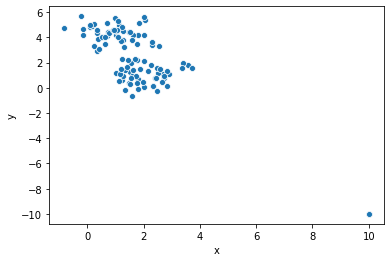

In [ ]:
sns.scatterplot(x="x", y="y", data=df)
plt.show()

#### The dataset shows two somewhat separated clusters and at least one outlier.
a. First let's see what k-means algorithm will do when we ask for the "right amount of clusters."

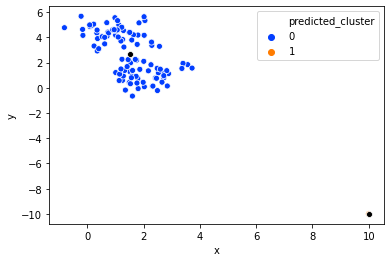

In [ ]:
X=df[['x','y']]
kmeans=KMeans(n_clusters=2).fit(X)
df['predicted_cluster']=kmeans.labels_

df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['x','y'])
df_centroids

palette = sns.color_palette("bright", 2)
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df, legend='full', palette=palette)
sns.scatterplot(x="x", y="y", data=df_centroids, color='black')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


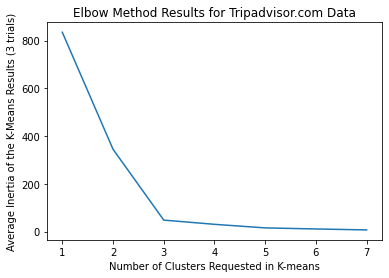

In [ ]:
#What happens if we run it multiple times (asking for different cluster numbers?
cluster_num_list=range(1,8)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    for i in range(0,3):
        sub_inertia_list=[]
        kmeans=KMeans(n_clusters=k).fit(df[df.columns[1:len(df.columns)]])
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Artificial Data')
plt.show()

#### What happened here, why did k-means not identify the two clusters that we wanted?
b. First describe, what k-means is 'claiming' about the data?


c. Where do you think the two centroids ACTUALLY ARE in this dataset?

d. What if the centroids were placed in the center of the two clusters (that we actually wanted), which of the following clusterings do you think would have smaller inertia?
  * the clustering where the centroids actually ended up?
  * a clustering in which the centroids were in the center of the two clusters we want?

> **In this Example** we observed the following. </br>
>> _ _ _ _FILL IN BLANK _ _ _ _ _ 

> **In General**: in the presence of outliers, the k-means algorithm will do the following.
* Performance  _ _ _ _FILL IN BLANK _ _ _ _ _  be affected.
* It will  _ _ _ _FILL IN BLANK _ _ _ _ _  explicitly identify observations as outliers.
* The prototypes (ie. centroids) will _ _ _ _FILL IN BLANK _ _ _ _ _ be representative of the clusters.

.... so what is a BETTER WAY to cluster data that has outliers?


### <u>Recall</u>: Is the mean a measure of center that is robust to outliers?

_ _ _ _FILL IN BLANK _ _ _ _ _


# New Clustering Algorithm 1:
### Let's try the **k-medoids** algorithm instead. k-medoids is very similar to the k-means algorithm, except now the _ _ _ _FILL IN BLANK _ _ _ _ _ is used as the centroid (prototype) of a cluster, instead of the _ _ _ _FILL IN BLANK _ _ _ _ _.

In [ ]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

     / 1.8MB 577kB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=617893 sha256=4b43e56583955c9084ff7fdf1e0cbb40d97b71d6904ff96dd5f56110fb7ffe87
  Stored in directory: /tmp/pip-ephem-wheel-cache-mh3xxd6u/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built scikit-learn-extra


In [ ]:
from sklearn_extra.cluster import KMedoids

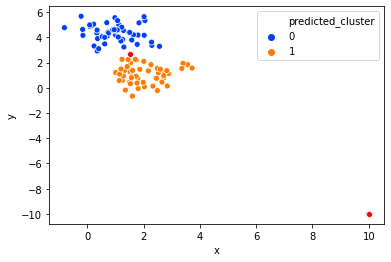

In [ ]:
kmedoids = KMedoids(n_clusters=2).fit(X)
df['predicted_cluster']=kmedoids.labels_

df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['x','y'])
df_centroids

palette = sns.color_palette("bright", 2)
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df, legend='full', palette=palette)
sns.scatterplot(x="x", y="y",color='red', data=df_centroids)

plt.legend(bbox_to_anchor=(1,1))
plt.show()

> **In this Example** we observed the following. </br>
>> _ _ _ _FILL IN BLANK _ _ _ _ _ 

> **In General**: in the presence of outliers, the k-medoid algorithm tends to do _ _ _ _FILL IN BLANK _ _ _ _ _ than the k-means algorithm.

<hr>

### <u>Example 3</u>: Next let's take a look at what k-means algorithm will do in the presence of **non-spherical shaped clusters**.

In [ ]:
#Let's read a csv into a dataframe from this url below
df=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/spiral.csv')
df.head()

,x,y,actual_cluster
0,1.50000,0.000000,0
1,1.50973,0.028461,0
2,1.51892,0.057289,0
3,1.52755,0.086473,0
4,1.53562,0.116003,0


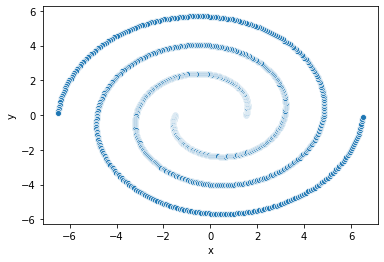

In [ ]:
sns.scatterplot(x="x", y="y", data=df)
plt.show()

#### The dataset shows two non-spherical clusters. 
a. What do you think the k-means algorithm will do if we ask it to find two clusters? Where do you think the centroids will be? 

(ANSWER THIS BEFORE RUNNING THE CODE BLOCK BELOW)

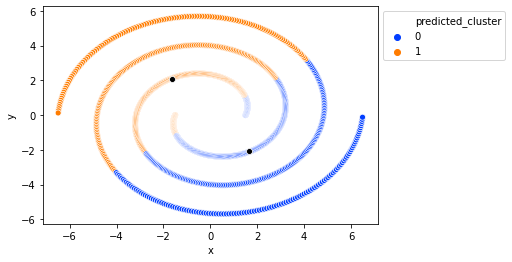

In [ ]:
X=df[['x','y']]
kmeans=KMeans(n_clusters=2).fit(X)
df['predicted_cluster']=kmeans.labels_

df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['x','y'])
df_centroids

palette = sns.color_palette("bright", 2)
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df, legend='full', palette=palette)
sns.scatterplot(x="x", y="y", data=df_centroids, color='black')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


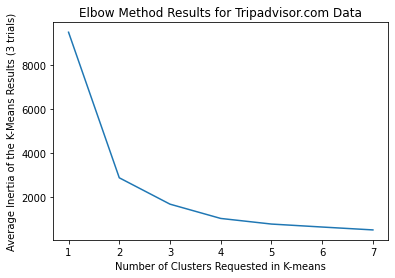

In [ ]:
#What happens if we run it multiple times (asking for different cluster numbers?
cluster_num_list=range(1,8)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    for i in range(0,3):
        sub_inertia_list=[]
        kmeans=KMeans(n_clusters=k).fit(df[df.columns[1:len(df.columns)]])
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Artificial Data')
plt.show()

> **In this Example** we observed the following. </br>
>> _ _ _ _FILL IN BLANK _ _ _ _ _ 

> **In General**: 
* The k-means algorithm will partition the space of data into what's known as a _ _ _ _FILL IN BLANK _ _ _ _ _ Diagram (see slides for a picture). This diagram partitions the plane that the data resides in into a set of regions bounded by intersecting line segments. These line segments represent the points in the plane that are _ _ _ _FILL IN BLANK _ _ _ _ _ to the two nearest centroids.

> **In General**: when there are non-spherical clusters 
* the k-means algorithm will underperform.

# Definition 3:
> **A graph-based definition of a cluster**: a group of objects that are connected to one another, but have no connection to objects outside the group.

# Definition 4:
> **A continguity-based definition of a cluster**: (a type of graph-based cluster definition) two objects are connected only if they are within a specified distance of one another

>> The **Agglomerative Hierarchical Clustering Algorithm (with Single Linkage)** algorithm (will learn in later lectures):
  * uses a contiguity-based definition of a cluster.
  * would be able to identify these clusters.

# Definition 5:
> **A Shared-Property (Conceptual) definition of a cluster**: a set of objects that share some property. (See slides)


<hr>

### <u>Example 5</u>: Next let's think about what the k-means clustering algorithm (even when performing well) can *tell* us about the clusters that it finds.

In [ ]:
#Let's read a csv into a dataframe from this url below
df=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/nested_blobs.csv')
df.head()

,x,y,actual_cluster
0,0.108463,0.264714,0
1,5.549467,4.443618,2
2,0.046562,0.211730,0
3,5.226932,6.036516,2
4,5.681127,6.012235,2


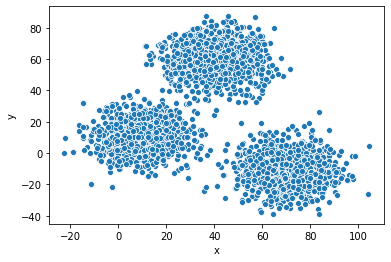

In [ ]:
sns.scatterplot(x="x", y="y", data=df)
plt.show()

#### Class Poll: Do you think k-means will be able to successfully cluster this dataset?

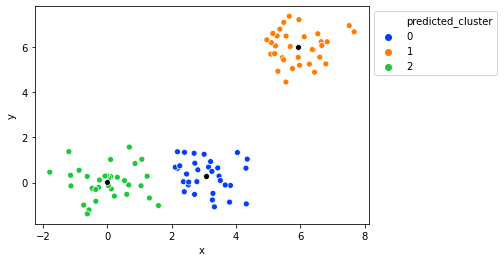

In [ ]:
#Let's cluster the data asking for 3 clusters
X=df[['x','y']]
kmeans=KMeans(n_clusters=3).fit(X)
df['predicted_cluster']=kmeans.labels_

df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['x','y'])
df_centroids

palette = sns.color_palette("bright", 3)
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df, legend='full', palette=palette)
sns.scatterplot(x="x", y="y", data=df_centroids, color='black')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

> **In this Example** we observed the following. </br>
>> _ _ _ _FILL IN BLANK _ _ _ _ _ 



# Definition 6:
> **A Partitional Clustering**: a division of the set of data objects into non-overlapping subsets (clusters) such that each object is in exactly one subset.

# Definition 7:
> In a **Hierarchical Clustering** we allow for clusters to have sub-clusters. A hierarchical clustering is displayed as a set of nested clusters displayed as a tree.

<hr>

### <u>Example 6</u>: Finally let's think about what the k-means clustering algorithm (even when performing well) can *tell* us about the *extent to which each object belongs to a particular cluster.*



In [ ]:
#Let's read a csv into a dataframe from this url below
df=pd.read_csv('https://raw.githubusercontent.com/vmellison/STAT430/master/Data/xclara.csv')
df.head()

,x,y,actual_cluster
0,2.072345,-3.241693,1
1,17.936710,15.784810,1
2,1.083576,7.319176,1
3,11.120670,14.406780,1
4,23.711550,2.557729,1


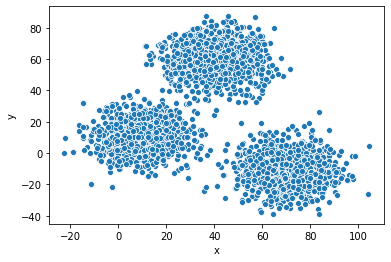

In [ ]:
sns.scatterplot(x="x", y="y", data=df)
plt.show()

#### Class Poll: Which cluster do you think the object at (40,20) SHOULD be assigned to (top cluster or left cluster)?

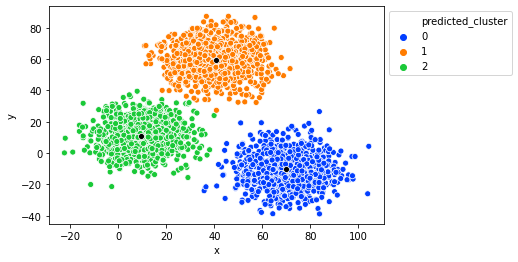

In [ ]:
#Let's cluster the data asking for 3 clusters
X=df[['x','y']]
kmeans=KMeans(n_clusters=3).fit(X)
df['predicted_cluster']=kmeans.labels_

df_centroids=pd.DataFrame(kmeans.cluster_centers_, columns=['x','y'])
df_centroids

palette = sns.color_palette("bright", 3)
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df, legend='full', palette=palette)
sns.scatterplot(x="x", y="y", data=df_centroids, color='black')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

> **In this Example** we observed the following. </br>
>> _ _ _ _FILL IN BLANK _ _ _ _ _ 



# Definition 8:
> **An Exclusive Clustering**: will assign an object to a single cluster.
* <u>Ex</u>: the k-means algorithm is an exclusive clustering algorithm.

# Definition 9:
> An **overlapping clustering** *can* allow for an object to be assigned to more than one cluster.

# Definition 10:
> In a **fuzzy clustering**, every object belongs to every cluster with a membership weight that is between 0 (absolutely doesn't belong) to 1 (absolutely belongs).
* Usually the sum of each objects weights must sum to 1.
* $weight_{ij}=$ the probability that object i belongs to cluster j
